## Energy Bar Charts:

##### Why?

Energy bar charts are core tool for visualizing work-energy problems. It would be lovely to have a tool that is interactive AND provides an effective tool for both problem solving as well as teaching. That's what this is attempting. Static first!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Some data

[numpy.arange() documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [8]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)

ind = np.arange(N)    # the x locations for the groups
width = 0.35    

### Bar Graph

[pyplot.bar documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)


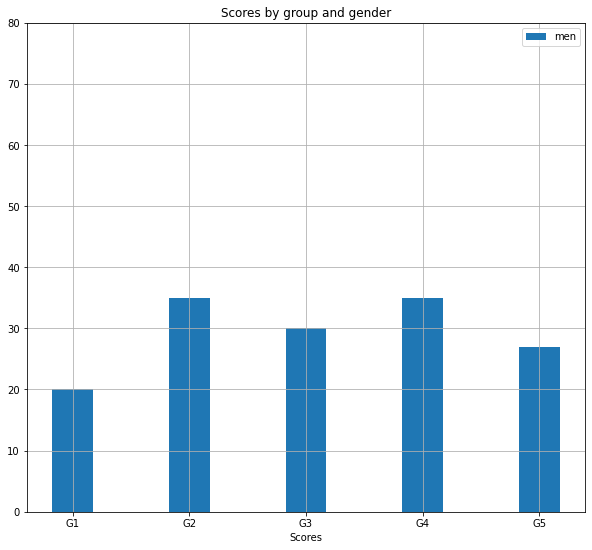

In [11]:
fig1, ax1 = plt.subplots()

# bar graph
ax1.bar(ind, 
        menMeans, 
        width, 
        label= 'men')

# turn on plot grid
ax1.grid()

# labeling stuff
plt.xlabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend()
# Set the size of my plot for better visibility
fig1.set_size_inches(10, 9)

#fig.savefig("myplot.png")
plt.show()